<a href="https://colab.research.google.com/github/Swati55/Netflix-data/blob/main/R_PROJECT_Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#intro

In [ ]:
install.packages("tidyr")
install.packages('tidyverse')
install.packages("dplyr")
library(tidyr)
library(tidyverse)
library(dplyr)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.4.4     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
#load dataset
df=read.csv("flix.csv")

#display summary
summary(df)

#display the structure
str(df)

#display first few rows
head(df)

# Tabulate frequencies for categorical variables
table(df$Type)
table(df$Genre)

#Replace blanks by NA on all columns
df[df==""]<- NA

#total count of NA values
sum(is.na(df))

#columnwise NA count
na_count <-sapply(df, function(y) sum(is.na(y)))
na_count=data.frame(na_count)
na_count

#total entries
paste("length before dropping",length(df$Genre))

#NA values fairly less, so we will drop na
df=df %>% drop_na()
paste("length after dropping NA :",length(df$Genre))

#converting comma separated numbers to integers in Watchtime column
df$Watchtime <- as.integer(gsub(",", "", df$Watchtime))

      Rank          Title               Type              Premiere   
 Min.   :    1   Length:18164       Length:18164       Min.   :1940  
 1st Qu.: 4592   Class :character   Class :character   1st Qu.:2012  
 Median : 9132   Mode  :character   Mode  :character   Median :2017  
 Mean   : 9127                                         Mean   :2014  
 3rd Qu.:13673                                         3rd Qu.:2020  
 Max.   :18214                                         Max.   :2023  
                                                       NA's   :134   
    Genre            Watchtime         Watchtime.in.Million
 Length:18164       Length:18164       Length:18164        
 Class :character   Class :character   Class :character    
 Mode  :character   Mode  :character   Mode  :character    
                                                           
                                                           
                                                           
                    

'data.frame':	18164 obs. of  7 variables:
 $ Rank                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Title               : chr  "The Night Agent" "Ginny & Georgia" "The Glory" "Wednesday" ...
 $ Type                : chr  "TV Show" "TV Show" "TV Show" "TV Show" ...
 $ Premiere            : int  2023 2021 2022 2022 2023 2018 2011 2020 2021 2023 ...
 $ Genre               : chr  "Action" "Drama" "Thriller" "Fantasy" ...
 $ Watchtime           : chr  "81,21,00,000" "66,51,00,000" "62,28,00,000" "50,77,00,000" ...
 $ Watchtime.in.Million: chr  "812.1M" "665.1M" "622.8M" "507.7M" ...


,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime.in.Million
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,The Night Agent,TV Show,2023,Action,"81,21,00,000",812.1M
2,2,Ginny & Georgia,TV Show,2021,Drama,"66,51,00,000",665.1M
3,3,The Glory,TV Show,2022,Thriller,"62,28,00,000",622.8M
4,4,Wednesday,TV Show,2022,Fantasy,"50,77,00,000",507.7M
5,5,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,"50,30,00,000",503.0M
6,6,You,TV Show,2018,Crime,"44,06,00,000",440.6M



  Movie TV Show 
  10880    7284 


                         Action       Adventure       Animation       Biography 
            180            1100             281            2670             199 
      Broadcast          Comedy        Concerts           Crime     Documentary 
             22            3946              20            1081            1294 
          Drama      Fairy Tale          Family         Fantasy       Game-Show 
           3349              12              72             303               9 
        History          Horror         Musical            News    Reality-Show 
            154             654              40               1             574 
        Romance Science Fiction          Sports        Stand-Up       Superhero 
            519             398              17             224             143 
      Talk Show        Thriller             War         Western 
             82             675              90              55 

[1] 314

,na_count
,<int>
Rank,0
Title,0
Type,0
Premiere,134
Genre,180
Watchtime,0
Watchtime.in.Million,0


[1] "length before dropping 18164"

[1] "length after dropping NA : 17879"

#Q1

Customer A would like to watch a crime Movie that is
premiered between 2000 and 2023 and most viewed.
What would be your recommendation?

In [ ]:
unique(df$Genre)
unique(df$Premiere)
unique(df$Type)

[1] "Action"          "Drama"           "Thriller"        "Fantasy"        
 [5] "Crime"           "Reality-Show"    "Comedy"          "History"        
 [9] "Superhero"       "Animation"       "Science Fiction" "Horror"         
[13] "Adventure"       "Documentary"     "War"             "Musical"        
[17] "Romance"         "Family"          "Stand-Up"        "Western"        
[21] "Sports"          "Biography"       "Talk Show"       "Game-Show"      
[25] "Broadcast"       "Concerts"        "News"            "Fairy Tale"

[1] 2023 2021 2022 2018 2011 2020 2012 2013 2010 2016 2003 2019 2008 2017 2000
[16] 2004 2015 2014 2009 1996 2005 1994 2007 2001 1989 1997 2006 2002 1993 1999
[31] 1995 1972 1983 1978 1998 1974 1986 1988 1991 1976 1985 1987 1992 1977 1990
[46] 1979 1973 1982 1966 1984 1980 1975 1940 1963 1970 1981 1964 1960 1971 1968
[61] 1969 1962 1954 1961 1953 1957 1956 1958 1965 1951 1955 1967 1952

[1] "TV Show" "Movie"

In [ ]:
q1df=df[df$Genre=='Crime'& df$Premiere >1999 & df$Premiere<=2023, ]
head(q1df,1)

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime.in.Million
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
6,6,You,TV Show,2018,Crime,"44,06,00,000",440.6M


#Q2
Customer B would like to watch a historical TV show that
is premiered between 2010 and 2020 and least viewed.
What would be your recommendation?

In [ ]:
q2df=df[df$Genre=='History'& df$Premiere >=2010 & df$Premiere<=2020, ]
tail(q2df,1)

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime.in.Million
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
17365,17674,Laia,Movie,2016,History,100000,0.1M


#Q3
Provide a histogram based on the year, genre, movie,
views etc

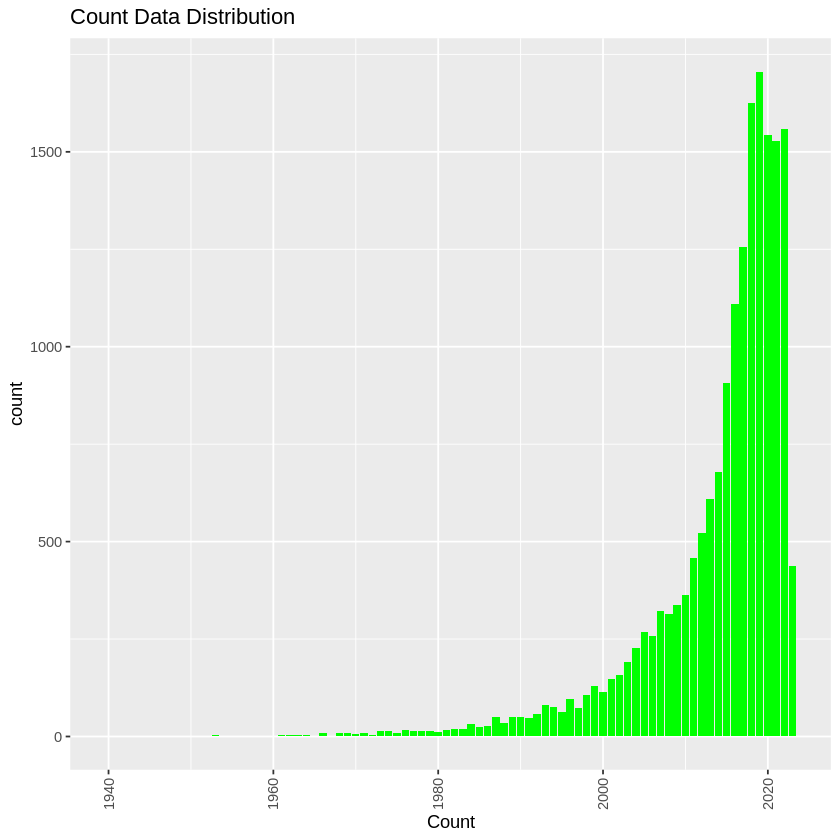

In [ ]:
ggplot(df, aes(x = Premiere)) +
  geom_bar(fill="green") +
  labs(x = "watchtime") +
  ggtitle("Count Data Distribution") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


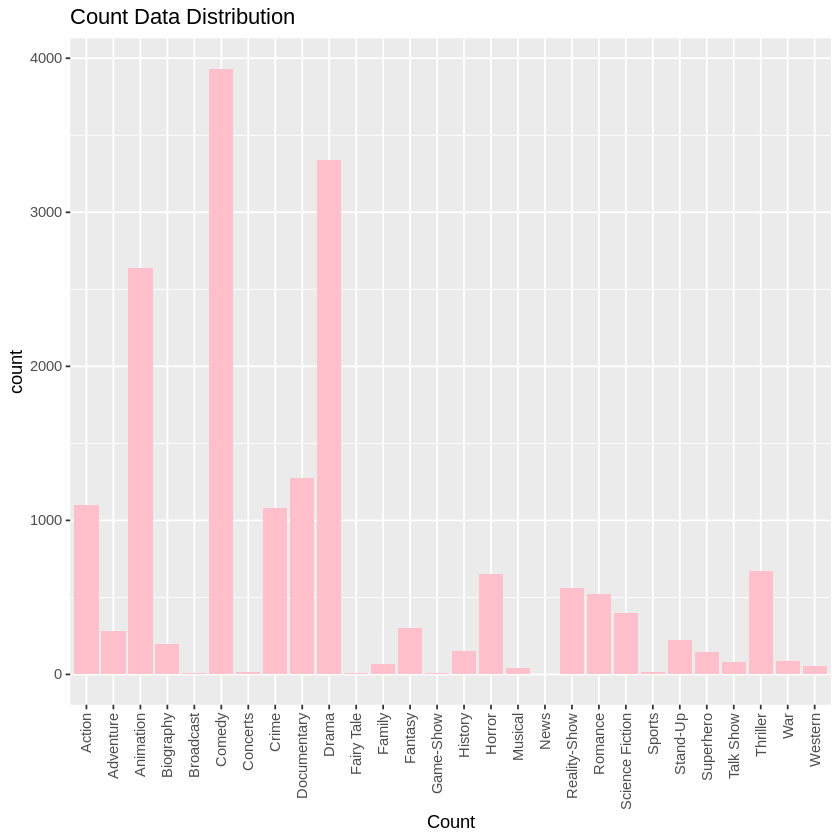

In [ ]:
ggplot(df, aes(x = Genre)) +
  geom_bar(fill="pink") +
  labs(x = "Watchtime") +
  ggtitle("Count Data Distribution") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

intervals,Freq
<fct>,<int>
"[0,100)",17790
"[100,200)",65
"[200,300)",15
"[300,400)",1
"[400,500)",3
"[500,600)",2
"[600,700)",2
"[700,800)",0


[1] 0

[1] 812

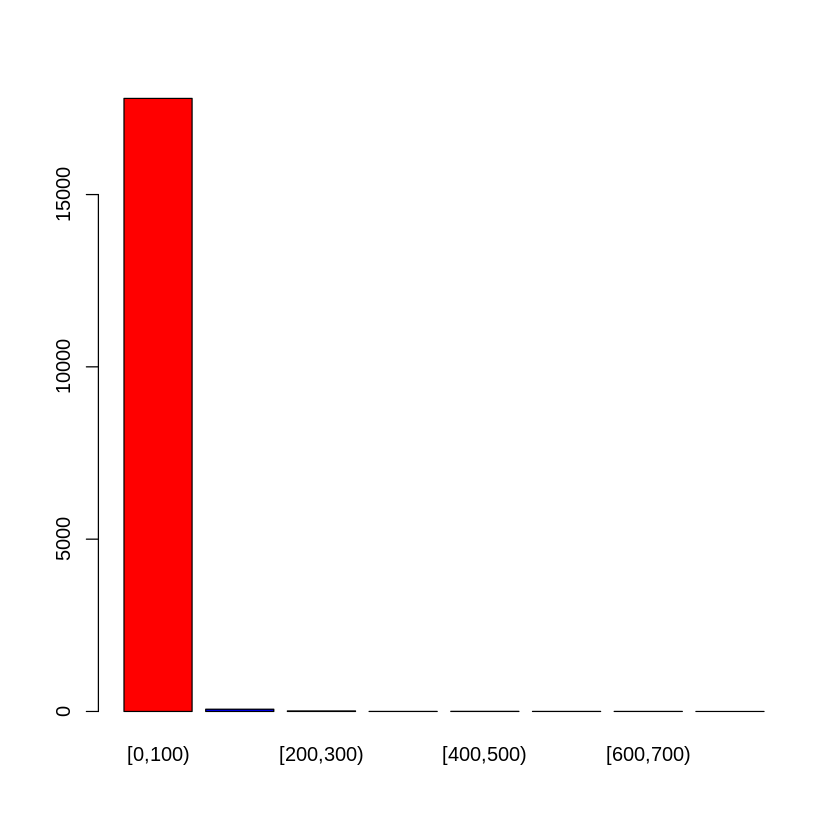

In [ ]:
min(df$Watchtime.in.Million)
max(df$Watchtime.in.Million)

# Define intervals
intervals <- cut(df$Watchtime.in.Million, breaks = seq(0, 800, by = 100), right = FALSE)
freq_table <- table(intervals)
barplot(freq_table, col = c("red", "blue", "green", "orange", "purple"))
freq_table=data.frame(freq_table)



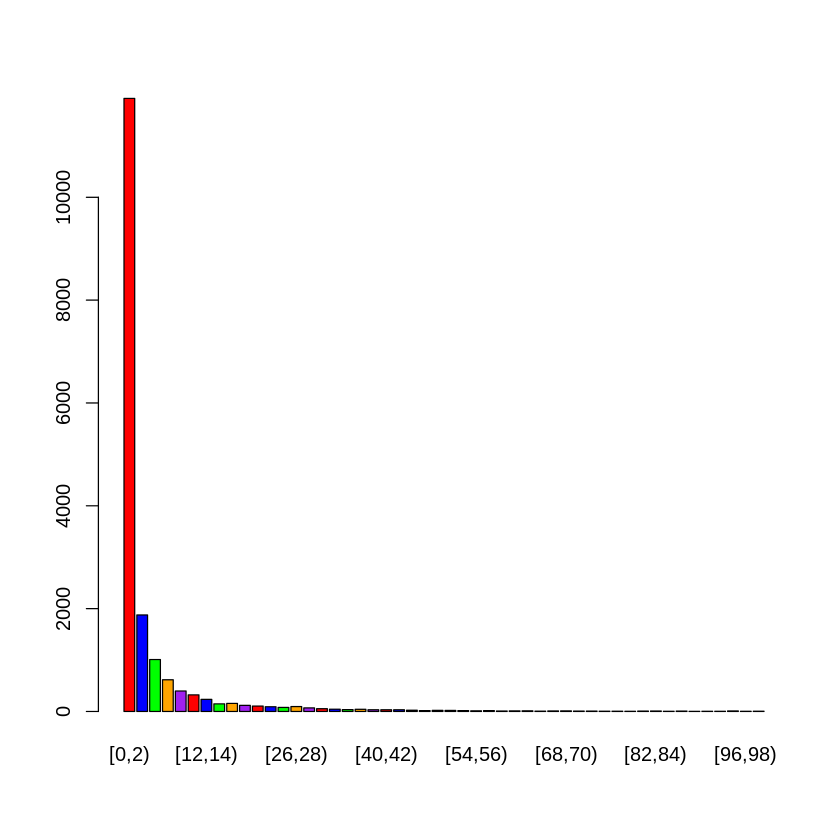

In [ ]:
intervals2 <- cut(df$Watchtime.in.Million, breaks = seq(0, 100, by = 2), right = FALSE)
freq_table <- table(intervals2)
barplot(freq_table, col = c("red", "blue", "green", "orange", "purple"))

In [ ]:
data <- c(10, 15, 20, 25, 30, 35, 40, 45, 50, 55)

# Define intervals
intervals <- cut(data, breaks = seq(0, 60, by = 10), right = FALSE)

# Compute frequency table
freq_table <- table(intervals)

# Print the frequency table
print(freq_table)

intervals
 [0,10) [10,20) [20,30) [30,40) [40,50) [50,60) 
      0       2       2       2       2       2 


#Q4
Create a piece of software in such a way that, it asks the
input from the customer as follows

◼ Type of movie or TV show

◼ Genre

◼ Range of years

◼ Number of views

◼ Based on the above input, your software should provide
a suggested movie to the customer

In [ ]:
recommend=function(){
type=readline(prompt="Enter the type: ")
g=readline(prompt="Enter the genre: ")
n=as.integer(readline(prompt="Enter the start year: "))
m=as.integer(readline(prompt="Enter the end year: "))
a=(readline(prompt="Enter the min views in million (from 1 to 812 million): "))
b=(readline(prompt="Enter the max views in milions (from 1 to 812 million): "))


recommendation=df[df$Type==type & df$Premiere >=n & df$Premiere<=m & df$Genre==g & df$Watchtime>=a & df$Watchtime<=b, ]
return(head(recommendation,1))
}


In [ ]:
recommend()

Enter the type: Movie
Enter the genre: Crime
Enter the start year: 2003
Enter the end year: 2011
Enter the min views in million (from 1 to 812 million): 1000000
Enter the max views in milions (from 1 to 812 million): 81000000


,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime.in.Million
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>
914,916,Inside Man,Movie,2006,Crime,23100000,23


#Q5
Design another 5 problems that you can extract
information and provide to Netflix from this dataset


In [ ]:
####q1 watchtime of movies vs watchtime of tv shows
total_movies=nrow(df[df$Type=="Movie",])
total_tvshows=nrow(df[df$Type=="TV Show",])


[1] "total movies : 10742"

[1] "total_tv shows : 7137"

In [ ]:
paste("total movies :",total_movies)
paste("total_tv shows :", total_tvshows)
sum_table=df %>% group_by(Type) %>% summarize(tot_views= sum(Watchtime))
sum_table

[1] "total movies : 10742"

[1] "total_tv shows : 7137"

Type,tot_views
<chr>,<dbl>
Movie,25240800000
TV Show,67489800000


In [ ]:
##q2 convert the column "Watch time in millions" into an integer valued column
# Define a function to convert values with 'M' suffix to integers
convert_to_int <- function(x) {
  if (grepl("M$", x)) {
    # If the element ends with "M"
    numeric_part <- as.integer(sub("M", "", x))  # Remove "M" and convert to integer
  } else {
    # If the element doesn't end with "M"
    numeric_part <- as.integer(x)  # Convert to integer directly
  }
  return(numeric_part)
}
# Apply the function to the column
df$Watchtime.in.Million <- sapply(df$Watchtime.in.Million, convert_to_int)

# Print the modified dataframe
head(df)

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime.in.Million
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,1,The Night Agent,TV Show,2023,Action,812100000,812
2,2,Ginny & Georgia,TV Show,2021,Drama,665100000,665
3,3,The Glory,TV Show,2022,Thriller,622800000,622
4,4,Wednesday,TV Show,2022,Fantasy,507700000,507
5,5,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,503000000,503
6,6,You,TV Show,2018,Crime,440600000,440


In [ ]:
##q3 top 3 genre per year

#first sort df acc to descending year value
top_three_genre=function(year2){
#yearwise_df=df[order(df$Premiere, decreasing = FALSE), ]

#now group for each year
df_genre = yearwise_df %>% group_by(Premiere, Genre)%>% summarise(total_views= sum(Watchtime.in.Million))
df_genre=df_genre[df_genre$total_views!=0,]


genre_tot_views_foryear=df_genre[df_genre$Premiere==year2,]

print("Top three genre :")
head((genre_tot_views_foryear[order(-genre_tot_views_foryear$total_views),]),3)}

top_three_genre(2023)
top_three_genre(2022)
top_three_genre(2021)

`summarise()` has grouped output by 'Premiere'. You can override using the
`.groups` argument.


[1] "Top three genre:"


Premiere,Genre,total_views
<int>,<chr>,<int>
2023,Drama,2623
2023,Comedy,2498
2023,Crime,1847


`summarise()` has grouped output by 'Premiere'. You can override using the
`.groups` argument.


[1] "Top three genre:"


Premiere,Genre,total_views
<int>,<chr>,<int>
2022,Drama,2284
2022,Animation,1539
2022,Thriller,1416


`summarise()` has grouped output by 'Premiere'. You can override using the
`.groups` argument.


[1] "Top three genre:"


Premiere,Genre,total_views
<int>,<chr>,<int>
2021,Drama,2368
2021,Animation,1507
2021,Comedy,741


In [ ]:
##q4 Find the movie and tv show with the maximum views also find per genre most watched tv/movie

max_views <- df %>%
  group_by(Type) %>%
  slice_max(Watchtime)

# Print the movie with the maximum views
max_views

Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime.in.Million
<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>
14,The Mother,Movie,2023,Thriller,249900000,249
1,The Night Agent,TV Show,2023,Action,812100000,812


In [ ]:

# Find the movie with the maximum views per category
max_views_per_category <- df %>%
  group_by(Genre) %>%
  slice_max(Watchtime)

# Print the movie with the maximum views per category
max_views_per_category[order(max_views_per_category$Watchtime, decreasing=TRUE),]

Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime.in.Million
<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,The Night Agent,TV Show,2023,Action,812100000,812
2,Ginny & Georgia,TV Show,2021,Drama,665100000,665
3,The Glory,TV Show,2022,Thriller,622800000,622
4,Wednesday,TV Show,2022,Fantasy,507700000,507
6,You,TV Show,2018,Crime,440600000,440
15,Physical: 100,TV Show,2023,Reality-Show,235000000,235
16,Crash Course In Romance,TV Show,2023,Comedy,234800000,234
22,Vikings: Valhalla,TV Show,2022,History,205500000,205
28,Sweet Tooth,TV Show,2021,Superhero,182300000,182


In [ ]:
## q5 total Available movie/show per genre.Find correlation between availabe movies/shows per genre and watchtime per genre

genre_aval=data.frame(table(df$Genre))


genre_view <- df %>%
  group_by(Genre) %>% arrange(df,Genre) %>%
  summarise(tot_view=sum(Watchtime))

genre_aval

cor(genre_aval$Freq,genre_view$tot_view)

Var1,Freq
<fct>,<int>
Action,1099
Adventure,281
Animation,2638
Biography,198
Broadcast,12
Comedy,3933
Concerts,18
Crime,1080
Documentary,1275


[1] 0.9476787